In [33]:

import torch 
import numpy as np 
from dirichlet import * 
import torch
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri 

In [37]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [38]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [39]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [40]:
a = torch.tensor([0.9036, 0.9208, 0.9173])
b = torch.tensor([0.7231, 0.1062, 0.1707]) 

diff = a-b 

print(diff)

print(torch.norm(a-b,))
print(torch.norm(diff,))

tensor([0.1805, 0.8146, 0.7466])
tensor(1.1196)
tensor(1.1196)


In [26]:
np.sqrt(0.1805**2 + 0.8146**2 + 0.7466**2)

1.119627156691012

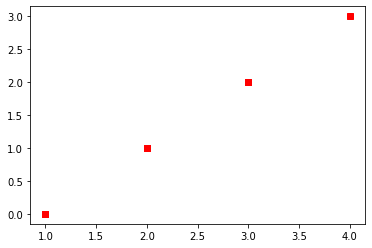

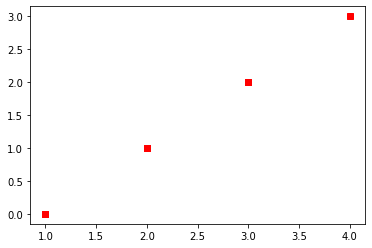

In [14]:
import matplotlib.pyplot as plt 
plt.figure() 
plt.plot([1,2,3], [0,1,2], 'rs', )
plt.plot([1,2,3,4], [0,1,2,3], 'rs', )

plt.figure() 
plt.plot([1,2,3], [0,1,2], 'rs', )
plt.plot([1,2,3,4], [0,1,2,3], 'rs', )

In [9]:
list(range(0+1))

[0]

In [35]:
output = [0.8077, 0.7874, 0.7990]
target = torch.tensor(
    [0.7231, 0.1062, 0.1707]
)

In [42]:
output =  torch.tensor(
    
)
print(output)

tensor([inf, inf, inf])


/var/folders/6t/cwpxfjt13rd3m9sgky7446mm0000gn/T/ipykernel_64274/1854029330.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(output)
/var/folders/6t/cwpxfjt13rd3m9sgky7446mm0000gn/T/ipykernel_64274/1854029330.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output =  torch.tensor(


In [40]:
distribution = Dirichlet(output)
distribution.rsample()

tensor([0.3646, 0.3000, 0.3354])

In [41]:
distribution.log_prob(target)

tensor(-2508.0156)

In [17]:
distribution.sample_n(4)

/Users/ericliu/Library/Python/3.8/lib/python/site-packages/torch/distributions/distribution.py:159: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


tensor([[0.5845, 0.3917, 0.0238],
        [0.5317, 0.3187, 0.1496],
        [0.0215, 0.9209, 0.0577],
        [0.6684, 0.3200, 0.0116]])

In [18]:
import math

def lbeta(alpha):
    return sum(math.lgamma(a) for a in alpha) - math.lgamma(sum(alpha))

def ldirichlet_pdf(alpha, theta):
    kernel = sum((a - 1) * math.log(t) for a, t in zip(alpha, theta))
    return kernel - lbeta(alpha)


In [19]:
ldirichlet_pdf(output, target)

tensor(0.6453)

In [44]:
m = torch.nn.Softmax(dim=1)  
input = torch.randn(2, 3) 
print(input)
print()
output = m(input) 
print(output)
print()
output_exp = torch.exp(output)
print(output_exp)

tensor([[ 1.4491,  0.0366,  0.9236],
        [-1.1179, -0.1849,  0.5777]])

tensor([[0.5450, 0.1327, 0.3223],
        [0.1112, 0.2827, 0.6061]])

tensor([[1.7246, 1.1419, 1.3802],
        [1.1176, 1.3267, 1.8332]])


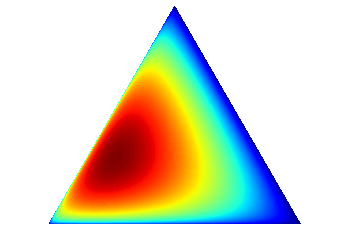

In [50]:
draw_pdf_contours(Dirichlet(output_exp[0]))

In [53]:
torch.clip(torch.tensor([100,200,1]), min = None, max = 100)

tensor([100, 100,   1])